In [1]:
# Importing the liberaries 
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
from imblearn.over_sampling import SMOTE
import shap


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [6]:
# Changing the boolean datatypes into integer datatypes
df['Weekend'] = df['Weekend'].astype('int64')
df['Revenue'] = df['Revenue'].astype('int64')

In [7]:
# Changing the other categorical variables into integer datatypes using ordinal encoding
# This transforms categorical value to numerical value in ordered sets through a dictionary

Month_dict = {'Feb' : 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df['Month'] = df.Month.map(Month_dict)

VisitorType_dict = {'Other': 0, 'New_Visitor' : 1, 'Returning_Visitor': 2}

df['VisitorType'] = df.VisitorType.map(VisitorType_dict)


In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.848824,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [10]:
# Use StandardScaler to standardize the data into a normal distribution because the features are measured at different scales
X = df.drop('Revenue', 1)
y = df['Revenue']
columns = X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)


In [11]:
# Logistic Regression model 
lr_model = LogisticRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(lr_model, X_std, y, scoring='accuracy', cv=cv, n_jobs=-1)

print(np.mean(scores))

0.8816707218167071


In [12]:
y_pred_lr = cross_val_predict(lr_model, X_std, y, cv = cv)

In [13]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y, y_pred_lr)
print(classification_report(y, y_pred_lr))
print("Cohen's Kappa:", cohen_kappa_score(y, y_pred_lr))
print("F1 score: ", f1_score(y, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     10422
           1       0.74      0.36      0.49      1908

    accuracy                           0.88     12330
   macro avg       0.82      0.67      0.71     12330
weighted avg       0.87      0.88      0.86     12330

Cohen's Kappa: 0.42772748693452867
F1 score:  0.48572435671483966


The Logistic Regression model tends to predict class 0 rather than class 1, because of the imbalanced data.

' Percentage of no transaction is 85%. Percentage of transaction is 15% (conversion rate). Our classes are imbalanced.'

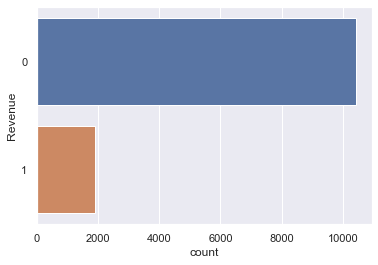

In [14]:
sns.countplot(y = 'Revenue', data = df)
df.Revenue.value_counts()

""" Percentage of no transaction is 85%. Percentage of transaction is 15% (conversion rate). Our classes are imbalanced."""

In [15]:
# Use oversampling using SMOTE for the imbalanced dataset
os = SMOTE(random_state = 0)
os_data_X, os_data_y = os.fit_resample(X_std, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Revenue'])

In [16]:
print(os_data_X.shape)
print(os_data_y.shape)

(20844, 17)
(20844, 1)


In [17]:
X_os =os_data_X
y_os =os_data_y['Revenue']


In [18]:
# Logistic Regression model with SMOTE
lr_model = LogisticRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(lr_model, X_os, y_os, scoring='accuracy', cv=cv, n_jobs=-1)

print(np.mean(scores))



0.8279603153520017


In [19]:
y_pred_lr_os = cross_val_predict(lr_model, X_os, y_os, cv = cv)

In [20]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_os, y_pred_lr_os)
print(classification_report(y_os, y_pred_lr_os))
print("Cohen's Kappa:", cohen_kappa_score(y_os, y_pred_lr_os))
print("F1 score: ", f1_score(y_os, y_pred_lr_os))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     10422
           1       0.88      0.76      0.82     10422

    accuracy                           0.83     20844
   macro avg       0.83      0.83      0.83     20844
weighted avg       0.83      0.83      0.83     20844

Cohen's Kappa: 0.6559201688735368
F1 score:  0.8153259861983726


The results show that the use of oversampling helps the Logistic Regression model to predict the class 1 better. 


In [21]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X_os):
    # split data
    X_train, X_test = X_os.iloc[train_ix, :], X_os.iloc[test_ix, :]
    y_train, y_test = y_os[train_ix], y_os[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # define the model
    model = LogisticRegression(random_state=1)
    # define search space
    space = dict()
    space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
    space['penalty'] = ['l2']
    space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
    #print("Best: %f using %s" % (acc,result.best_score_, result.best_params_))
    #means = result.cv_results_['mean_test_score']
    #stds = result.cv_results_['std_test_score']
    #params = result.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
      #   print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))


>acc=0.832, est=0.828, cfg={'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.825, est=0.829, cfg={'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=0.820, est=0.831, cfg={'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=0.830, est=0.826, cfg={'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=0.833, est=0.827, cfg={'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.828 (0.005)


In [22]:
# Logistic Regression model with the tuned hyperparameters
lr_model = LogisticRegression(C = 10, penalty = 'l2', solver= 'liblinear')
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(lr_model, X_os, y_os, scoring='accuracy', cv=cv, n_jobs=-1)

print(np.mean(scores))


0.8279603153520017


In [23]:
y_pred_lr_os = cross_val_predict(lr_model, X_os, y_os, cv = cv)

In [24]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_os, y_pred_lr_os)
print(classification_report(y_os, y_pred_lr_os))
print("Cohen's Kappa:", cohen_kappa_score(y_os, y_pred_lr_os))
print("F1 score: ", f1_score(y_os, y_pred_lr_os))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     10422
           1       0.88      0.76      0.82     10422

    accuracy                           0.83     20844
   macro avg       0.83      0.83      0.83     20844
weighted avg       0.83      0.83      0.83     20844

Cohen's Kappa: 0.6559201688735368
F1 score:  0.8153259861983726


For fold 1:
Accuracy: 0.8224215246636771
f-score: 0.7926701570680628
Results on the test set:
              precision    recall  f1-score   support

           0       0.75      0.97      0.84      2230
           1       0.95      0.68      0.79      2230

    accuracy                           0.82      4460
   macro avg       0.85      0.82      0.82      4460
weighted avg       0.85      0.82      0.82      4460



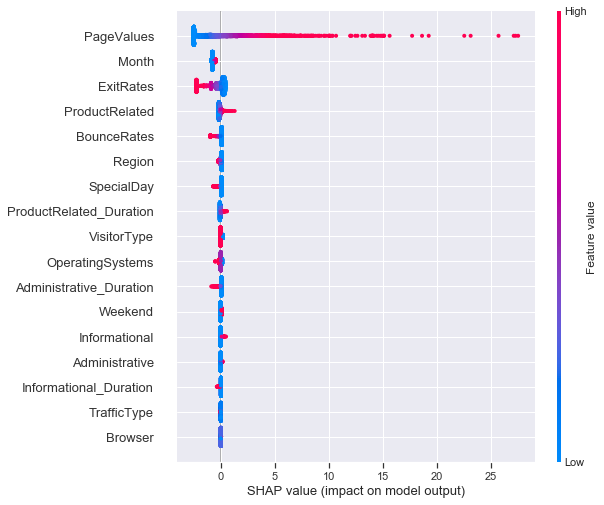

For fold 2:
Accuracy: 0.911070780399274
f-score: 0.9090487238979118
Results on the test set:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2204
           1       0.93      0.89      0.91      2204

    accuracy                           0.91      4408
   macro avg       0.91      0.91      0.91      4408
weighted avg       0.91      0.91      0.91      4408



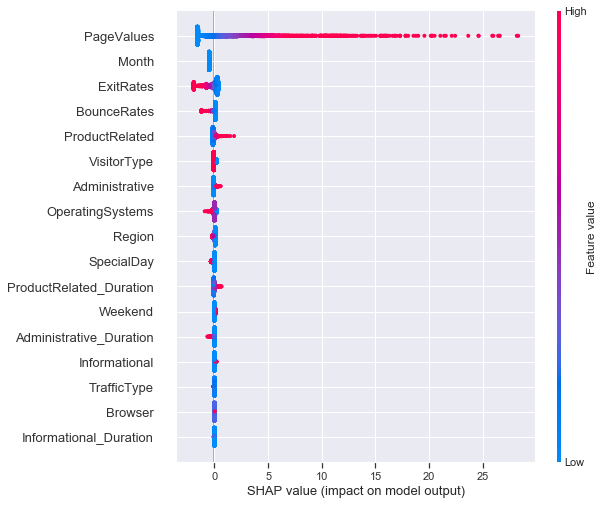

For fold 3:
Accuracy: 0.7950461389023799
f-score: 0.7783613445378151
Results on the test set:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      2059
           1       0.85      0.72      0.78      2059

    accuracy                           0.80      4118
   macro avg       0.80      0.80      0.79      4118
weighted avg       0.80      0.80      0.79      4118



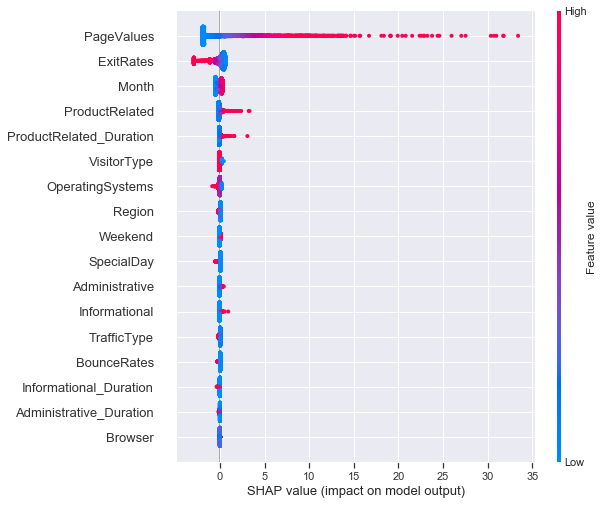

For fold 4:
Accuracy: 0.8048032703117016
f-score: 0.7980972515856237
Results on the test set:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1957
           1       0.83      0.77      0.80      1957

    accuracy                           0.80      3914
   macro avg       0.81      0.80      0.80      3914
weighted avg       0.81      0.80      0.80      3914



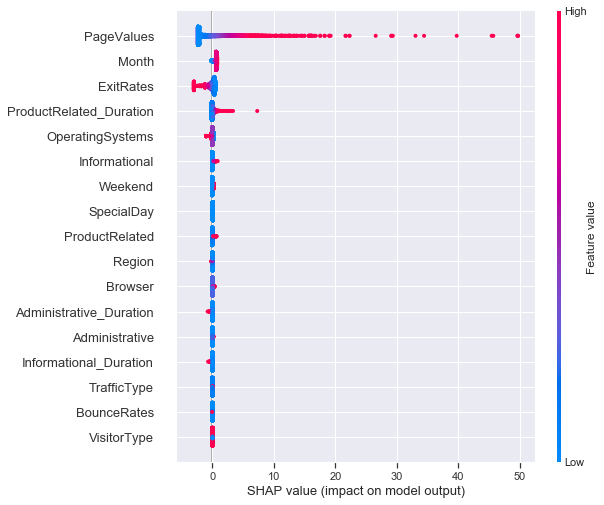

For fold 5:
Accuracy: 0.8098377281947262
f-score: 0.8040752351097179
Results on the test set:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1972
           1       0.83      0.78      0.80      1972

    accuracy                           0.81      3944
   macro avg       0.81      0.81      0.81      3944
weighted avg       0.81      0.81      0.81      3944



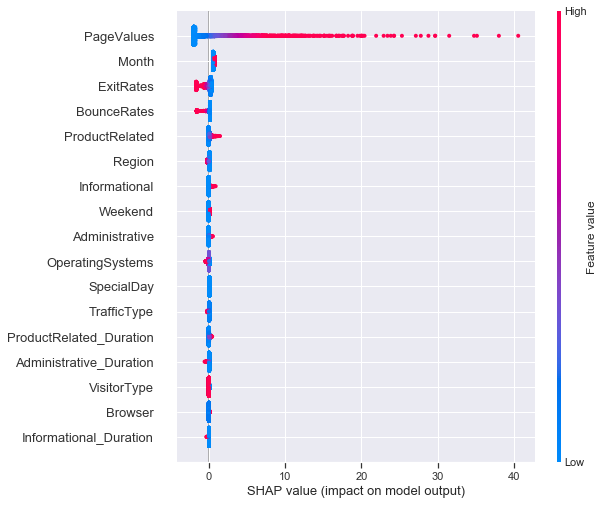

In [25]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

kf = KFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(kf.split(X_std), 1):
    X_train = X_std.iloc[train_index, :]
    y_train = y[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X_std.iloc[test_index, :]
    y_test = y[test_index]  # See comment on ravel and  y_train
    X_train_oversampled, y_train_oversampled = os.fit_resample(X_train, y_train)
    X_test_oversampled, y_test_oversampled = os.fit_resample(X_test, y_test)
    model = LogisticRegression(C = 10, penalty = 'l2', solver= 'liblinear') # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred_oversampled = model.predict(X_test_oversampled)
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test_oversampled, y_test_oversampled)}')
    print(f'f-score: {f1_score(y_test_oversampled, y_pred_oversampled)}')
    print('Results on the test set:')
    print(classification_report(y_test_oversampled, y_pred_oversampled))
    explainer = shap.LinearExplainer(model, X_train_oversampled, feature_dependence="independent")
    shap_values = explainer.shap_values(X_test_oversampled)
    shap.summary_plot(shap_values, X_test_oversampled)
    
    

The accuracy score for the second fold is the highest, indicating that PageValues, Month, and ExitRates are the most important features.

In [26]:
# Feature importance scores
shap_sum = (shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_os.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
10,Month,0.606852
4,ProductRelated,0.0664165
7,ExitRates,0.0493186
9,SpecialDay,0.041657
5,ProductRelated_Duration,0.0209838
2,Informational,0.017469
6,BounceRates,0.0154348
0,Administrative,0.0151713
15,VisitorType,0.00417848
12,Browser,0.000242342


In [27]:
# Feature importance scores with absolute values
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_os.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
8,PageValues,2.56736
10,Month,0.606852
7,ExitRates,0.257955
6,BounceRates,0.165871
4,ProductRelated,0.104655
13,Region,0.0786402
2,Informational,0.064856
16,Weekend,0.0610381
0,Administrative,0.0558839
11,OperatingSystems,0.0424504
